In [ ]:
%pip install pandas sqlalchemy psycopg2-binary matplotlib python-dotenv

In [2]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASS = os.getenv("DB_PASS")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

try:
    with engine.connect() as conn:
        print("Successfully connected to the database securely!")
except Exception as e:
    print(f"Connection failed: {e}")

Successfully connected to the database securely!


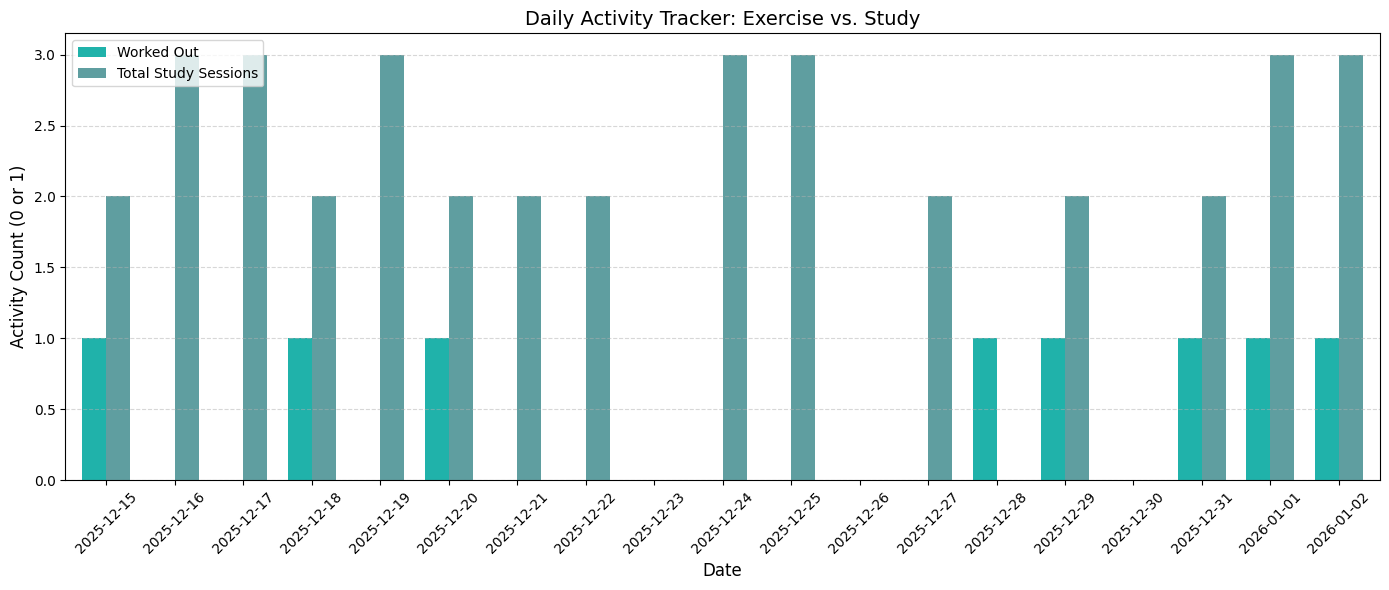

In [3]:
query_1 = """
SELECT 
    d.date_id AS "Day",
    he.worked_out::int AS "Worked Out",
    (ga.studied_ou::int + ga.studied_de::int + ga.studied_french::int) AS "Total Study Sessions"
FROM metrics_table AS mt
INNER JOIN date AS d 
    ON mt.date_id = d.date_id
INNER JOIN health AS he 
    ON mt.health_metric_id = he.health_metric_id
INNER JOIN goals_achieved AS ga 
    ON mt.goal_metric_id = ga.goal_metric_id
ORDER BY "Day";
"""

df = pd.read_sql(query_1, engine)

df_daily = pd.read_sql(query_1, engine)
df_daily['Day'] = pd.to_datetime(df_daily['Day']).dt.date

df_daily.plot(
    x='Day', 
    y=['Worked Out', 'Total Study Sessions'], 
    kind='bar', 
    figsize=(14, 6),
    width=0.7,
    color=['#20b2aa', '#5f9ea0']
)

plt.title('Daily Activity Tracker: Exercise vs. Study', fontsize=14)
plt.ylabel('Activity Count (0 or 1)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [6]:
query_2 = """
SELECT
    wt.date AS "Date",
    (wt.five_am::int + wt.eight_am::int + wt.twelve_pm::int + wt.two_pm::int + wt.four_pm::int + wt.six_pm::int) AS "Total Water Intake",
    mt.health_metric_id AS "Health Metric"
FROM metrics_table AS mt
INNER JOIN water_tracker AS wt
    ON wt.water_id = mt.water_id
GROUP BY wt.date, wt.five_am, wt.eight_am, wt.twelve_pm, wt.two_pm, wt.four_pm, wt.six_pm, mt.health_metric_id
ORDER BY wt.date;    
"""

df_water['Total Water Intake'] = pd.to_numeric(df_water['Total Water Intake'])
df_water['Health Metric'] = pd.to_numeric(df_water['Health Metric'])

# 2. Convert to datetime
df_water['Date'] = pd.to_datetime(df_water['Date'])

# 3. Plotting
ax = df_water.plot(
    x='Date', 
    y=['Health Metric', 'Total Water Intake'], 
    kind='bar', 
    figsize=(14, 6),
    width=0.7,
    color=['#20b2aa', '#5f9ea0']
)

# 4. Fix the X-axis labels (Bar charts with dates can get crowded)
# This will format the dates so they look like '2023-10-01'
ax.set_xticklabels([x.strftime('%Y-%m-%d') for x in df_water['Date']])

plt.title('Daily Water Consumption', fontsize=14)
plt.ylabel('Value', fontsize=12) 
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

ValueError: time data "16/12/2025" doesn't match format "%m/%d/%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.